In [ ]:
# Example 3: Characterising event aligned activity of a single cluster
#In this example we will show how to

#1. Load in trials data for a single session and spikesorting data for a single insertion
#2. Get spikes for chosen cluster
#3. Compute and plot firing rate of cluster around trial event
#4. Compute and plot peristimulus time histograms for different trial conditions (left vs right, correct vs incorrect)

In [18]:
# 1. Load in trials data and spikesorting data
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from one.api import ONE
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

one = ONE()

eid='288bfbf3-3700-4abe-b6e4-130b5c541e61'
pid='05ec6af9-6c83-422d-91a3-ba815fa65e92'
# [eid, pname] = one.pid2eid(pid)

sl = SessionLoader(eid=eid, one=one)
sl.load_trials()

ssl = SpikeSortingLoader(one=one, pid=pid)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)
print('DONE')

DONE


In [19]:
# 2. Get spikes for a single cluster
# Get the 10th good cluster
cluster_id = clusters['cluster_id'][clusters['label'] == 1][10]

# Get the index of the spikes object for the chosen cluster
spikes_idx = spikes['clusters'] == cluster_id

D:\IBL\Programs\Anaconda3\envs\ibl_env\lib\site-packages\brainbox\singlecell.py:48: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ts = np.repeat(align_times[:, np.newaxis], tscale.size, axis=1) + tscale


Text(0, 0.5, 'Trial number')

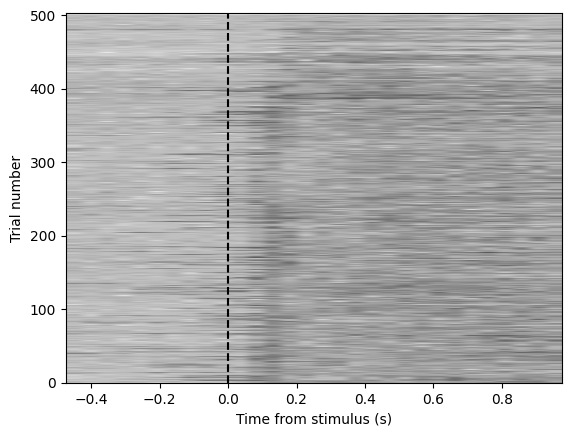

In [20]:
# 3. Compute firing rate of cluster around trial event and plot as a raster
# Find times when stimulus appears
events = sl.trials['stimOn_times']

from brainbox.singlecell import bin_spikes
# Compute number of spikes in 0.05s bins between 0.5s before stimulus presentation to 1s after stimulus presentation
bin_size = 0.05
pre_time = 0.5
post_time = 1

# get a spike raster
spike_raster, times = bin_spikes(spikes.times[spikes_idx], events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
spikes_raster = spike_raster / bin_size

fig, ax = plt.subplots()
ax.imshow(spike_raster, extent=[times[0], times[-1], 0, events.size], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
ax.axvline(0, c='k', linestyle='--')
ax.set_xlabel('Time from stimulus (s)')
ax.set_ylabel('Trial number')

Text(0.5, 0, 'Time from stimulus (s)')

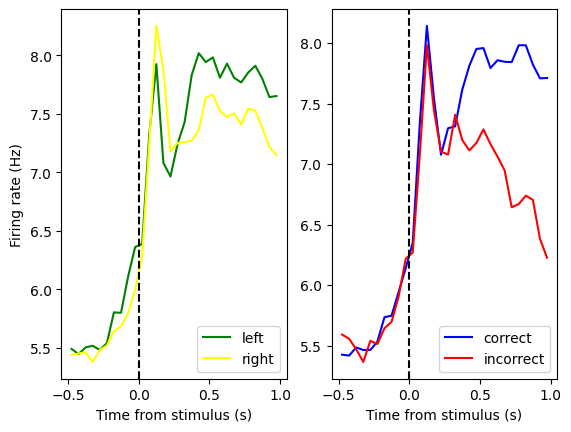

In [21]:
# 4. Compute peri stimulus time histogram for different trial events
# Compute psth for left vs right stimulus trials
left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])
psth_left = np.nanmean(spike_raster[left_idx], axis=0)
psth_right = np.nanmean(spike_raster[right_idx], axis=0) 

# Compute psth for correct vs incorrect trials
correct_idx = sl.trials['feedbackType'] == 1
incorrect_idx = sl.trials['feedbackType'] == -1
psth_correct = np.nanmean(spike_raster[correct_idx], axis=0)
psth_incorrect = np.nanmean(spike_raster[incorrect_idx], axis=0) 

# Plot the psths
fig, axs = plt.subplots(1, 2)
axs[0].plot(times, psth_left, c='green')
axs[0].plot(times, psth_right, c='yellow')
axs[0].legend(['left', 'right'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')

axs[1].plot(times, psth_correct, c='blue')
axs[1].plot(times, psth_incorrect, c='red')
axs[1].legend(['correct', 'incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')